#**Iris Classification - Project**

## Packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
from sklearn import datasets

## Dataset

In [3]:
iris = datasets.load_iris() #loading the dataset

In [4]:
iris.target.shape #output class or y

(150,)

In [5]:
iris.data.shape #shape of the features

(150, 4)

In [6]:
df = pd.DataFrame(iris.data) # turning the values to a DataFrame Object

In [7]:
df['target'] = iris.target

In [8]:
columns_map = {
    0:"Sepal Length",
    1:"Sepal Width",
    2:"Petal Length",
    3:"Petal Width",
}

In [9]:
df = df.rename(columns_map,axis=1)

In [10]:
df.isna().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
target          0
dtype: int64

In [11]:
df['target'].value_counts() #all the classes are equally distributed, no bias.

0    50
1    50
2    50
Name: target, dtype: int64

## EDA

In [ ]:
df.describe(include="all").T #statistical inference from the dataset.

,count,mean,std,min,25%,50%,75%,max
Sepal Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [ ]:
print("Percentage of missing values in each column")
(df.isnull().sum()/(len(df)))*100

Percentage of missing values in each column


Sepal Length    0.0
Sepal Width     0.0
Petal Length    0.0
Petal Width     0.0
target          0.0
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of the dataset

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X_r = pca.fit_transform(X) #reducing the features to 2-d data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x1 = []
x2 = []
x3 = []

for xi,yi in zip(X_r, y):
    if yi==0:
       x1.append(xi)
    elif yi==1:
       x2.append(xi)
    else:
       x3.append(xi)

x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)

print(x1)
print(x2)
print(x3)

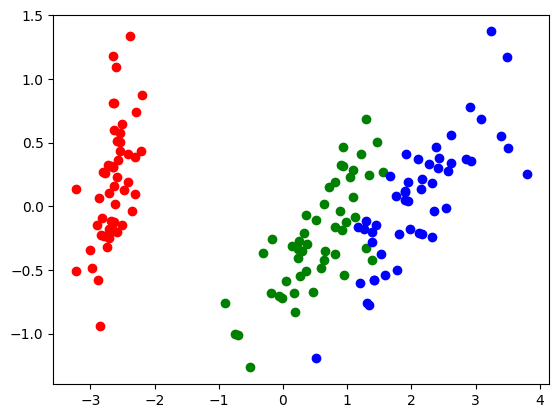

In [ ]:
#plotting the 2d reduced data.
plt.scatter(x1[:,0],x1[:,1], color='r')
plt.scatter(x2[:,0],x2[:,1], color='g')
plt.scatter(x3[:,0],x3[:,1], color='b')
plt.show()

In [ ]:
import statistics

Sepal Length
Skew : 0.31
Mean : 5.843333333333334
Median : 5.8
Mode : 5.0


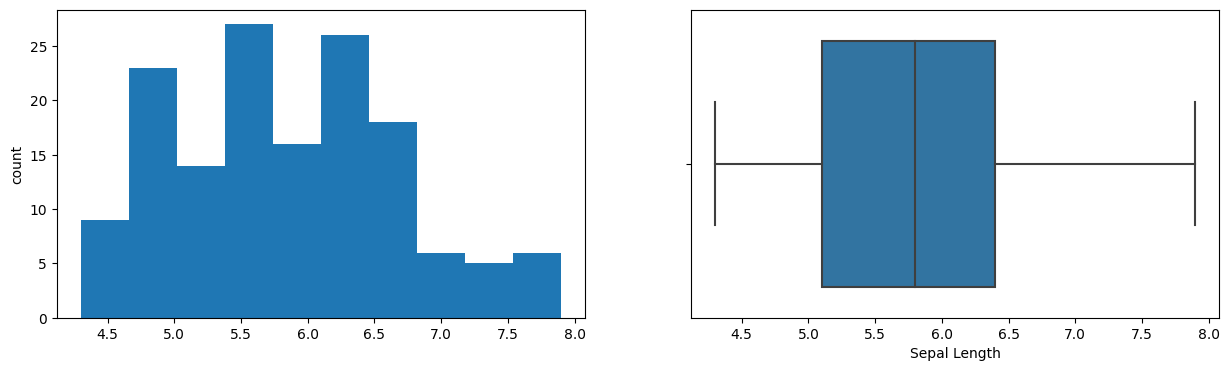

Sepal Width
Skew : 0.32
Mean : 3.0573333333333337
Median : 3.0
Mode : 3.0


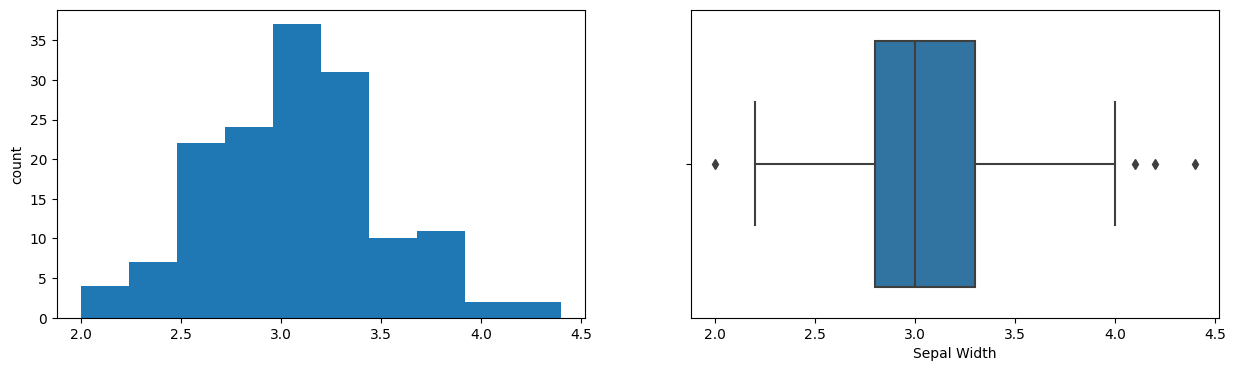

Petal Length
Skew : -0.27
Mean : 3.7580000000000005
Median : 4.35
Mode : 1.4


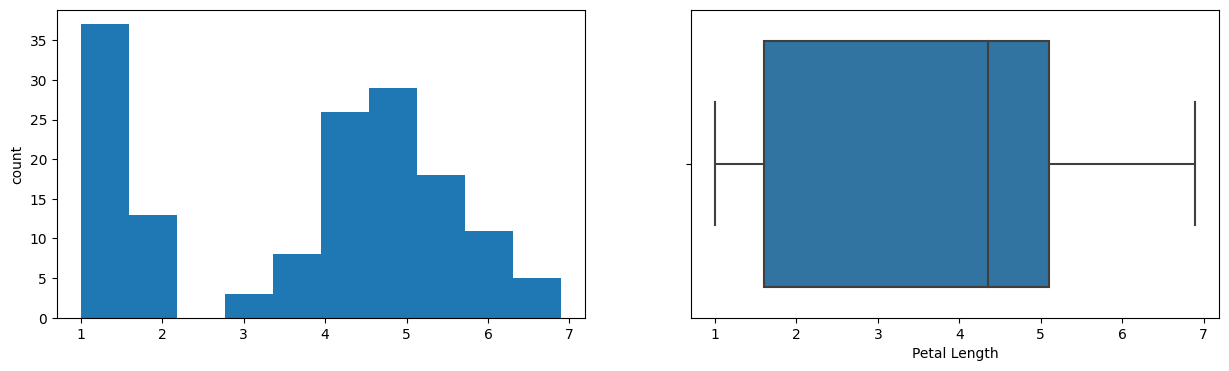

Petal Width
Skew : -0.1
Mean : 1.1993333333333336
Median : 1.3
Mode : 0.2


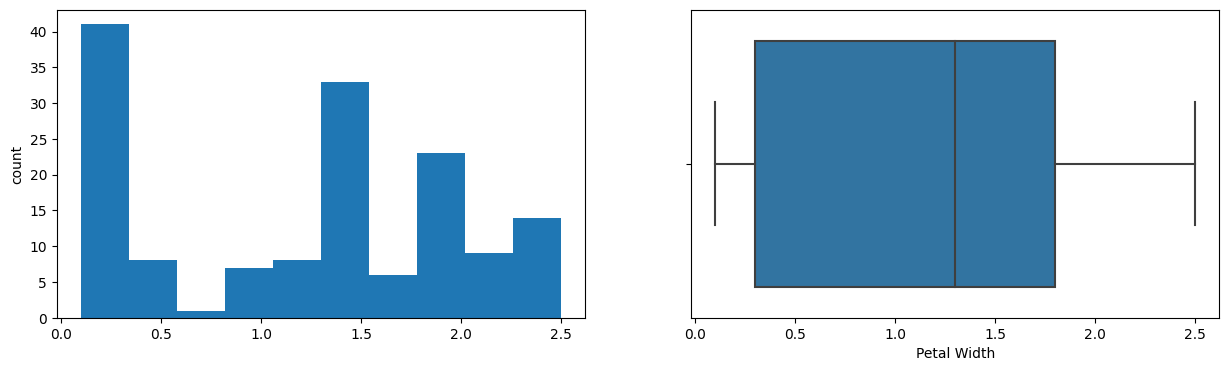

target
Skew : 0.0
Mean : 1.0
Median : 1.0
Mode : 0


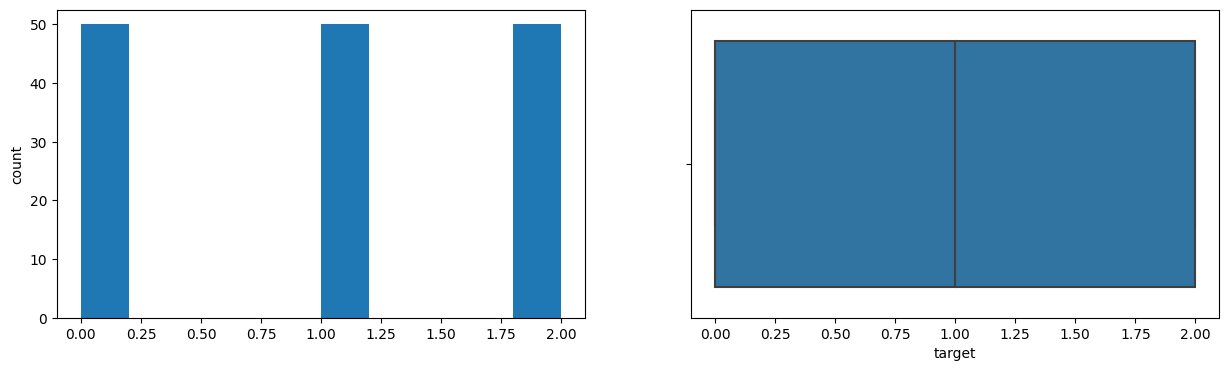

In [ ]:
for col in df.columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    print('Mean :', np.mean(df[col]))
    print('Median :', np.median(df[col]))
    print('Mode :', statistics.mode(df[col]))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
#Analysing the outliers in the column sepal width
filtered_rows = df[(df['Sepal Width'] < 2.2) | (df['Sepal Width'] > 4)]
filtered_rows

,Sepal Length,Sepal Width,Petal Length,Petal Width,target
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


### Correlation Matrix

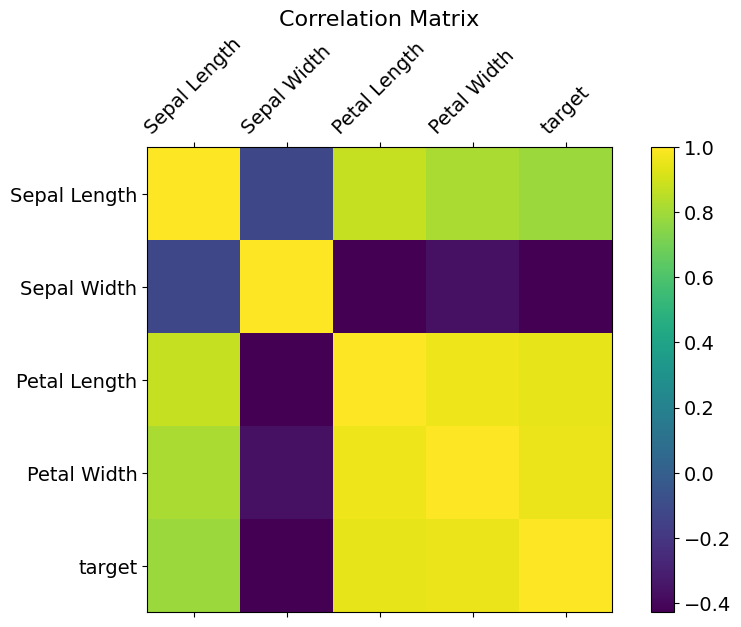

In [ ]:
f = plt.figure(figsize=(10, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Preparing the data for training the model

In [12]:
X = df.drop(["target"],axis=1) #features
y = df['target'] #output

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, random_state=42, test_size=0.2 ,stratify=y) #splitting the dataset into training and testing

## Evaluating the model

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
  """
    Reusable function to plot confusion matrix
    Args:
        y_test: Actual Test Data
        y_pred: Predicted Data

    Returns:
        None
  """
  con_mat = confusion_matrix(y_test, y_pred)
  con_mat = pd.DataFrame(con_mat, columns=['Setosa', 'Versicolor', 'Viriginica'],
                                  index=['Setosa', 'Versicolor', 'Viriginica'])
  sns.heatmap(con_mat, annot=True, fmt='d', cmap='PuBu')
  plt.show()


def print_classification_report(y_test, y_pred):
  """
    Reusable function to print the classification report
    Args:
        y_test: Actual Test Data
        y_pred: Predicted Data

    Returns:
        None
  """
  print(classification_report(y_test,y_pred))

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(X_train, y_train) #training

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_score = lr_model.score(X_train, y_train) #train score
test_score = lr_model.score(X_test, y_test) #test score
print(f"Train Score of the Linear Regression Model : {train_score}")
print(f"Test Score of the Linear Regression Model : {test_score}")

Train Score of the Linear Regression Model : 0.9655172413793104
Test Score of the Linear Regression Model : 0.9666666666666667


In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

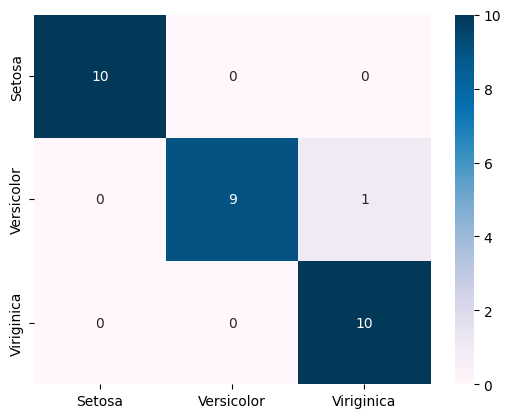

In [ ]:
#confusion matrix for the model
con_mat = confusion_matrix(y_test, y_pred)

con_mat = pd.DataFrame(con_mat, columns=['Setosa', 'Versicolor', 'Viriginica'],
                                 index=['Setosa', 'Versicolor', 'Viriginica'])

sns.heatmap(con_mat, annot=True, fmt='d', cmap='PuBu')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

#### Precision
Precision = TP / (FP+TP)
#### Accuracy
Accuracy = TP/ (TP+FN+TN+FP)

#### Recall
Recall = TP/ (FN+TP)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
clf = SVC(C=1,kernel='linear')
clf.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)
X_pred = clf.predict(X_train)
test_score = accuracy_score(y_test,y_pred)
train_score = accuracy_score(y_train,X_pred)
print(f"Train Score : {train_score}")
print(f"Test Score : {test_score}")

Train Score : 0.9833333333333333
Test Score : 1.0


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

report = classification_report(y_test,y_pred)
print(report)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

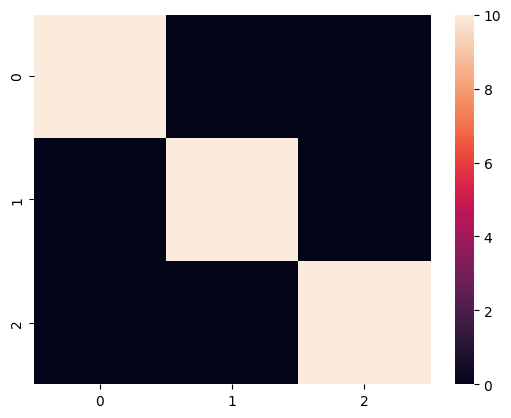

In [ ]:
import seaborn as sns
sns.heatmap(cm)

## KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = clf.predict(X_test)

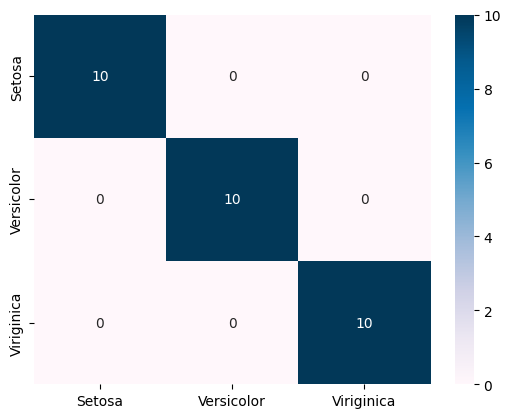

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
print_classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
X_pred = clf.predict(X_train)
test_score = accuracy_score(y_test,y_pred)
train_score = accuracy_score(y_train,X_pred)
print(f"Train Score : {train_score}")
print(f"Test Score : {test_score}")

Train Score : 0.9666666666666667
Test Score : 1.0


## Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier(random_state=0, criterion="gini", max_depth=20, class_weight="balanced")

In [34]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=0)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
X_pred = clf.predict(X_train)
test_score = accuracy_score(y_test,y_pred)
train_score = accuracy_score(y_train,X_pred)
print(f"Train Score : {train_score}")
print(f"Test Score : {test_score}")

Train Score : 1.0
Test Score : 0.9666666666666667


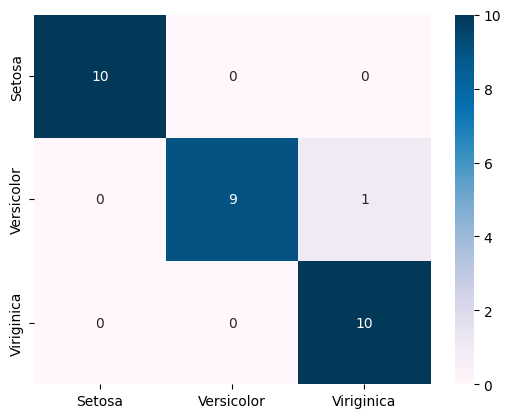

In [38]:
plot_confusion_matrix(y_test, y_pred)

In [39]:
print_classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

